# xcube CMEMS Data Store

This notebook provides a walk-through demonstrating how to use xcube and the xcube-cmems plugin to read and explore data from the CMEMS API.

In order to run this notebook you need to install the xcube_cmems plugin. You may do so by executing the following line in your terminal:

$  conda install -c conda-forge xcube-cmems

Or you can install the xcube_cmems plugin from sources by following the instructions on https://github.com/xcube-dev/xcube-cmems.

set CMEMS_USERNAME and CMEMS_PASSWORD as environment variables If you do not have cmems user yet, you can register for an account


In [1]:
from xcube_cmems.store import CmemsDataStore

In [2]:
import xcube_cmems

In [3]:
xcube_cmems.__version__

'0.4.0.dev'

In [4]:
cmems_store =  CmemsDataStore()

Get all the data ids in cmems datastore

In [5]:
list(cmems_store.get_data_ids())

Fetching catalog: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.42s/it]


['antarctic_omi_si_extent',
 'antarctic_omi_si_extent_obs',
 'cmems_mod_arc_bgc_anfc_ecosmo_P1D-m',
 'cmems_mod_arc_bgc_anfc_ecosmo_P1M-m',
 'cmems_mod_arc_phy_anfc_6km_detided_P1D-m',
 'cmems_mod_arc_phy_anfc_6km_detided_P1M-m',
 'cmems_mod_arc_phy_anfc_6km_detided_PT1H-i',
 'cmems_mod_arc_phy_anfc_6km_detided_PT6H-m',
 'cmems_mod_arc_phy_anfc_nextsim_P1M-m',
 'cmems_mod_arc_phy_anfc_nextsim_hm',
 'dataset-topaz6-arc-15min-3km-be',
 'dataset-wam-arctic-1hr3km-be',
 'cmems_mod_arc_bgc_my_ecosmo_P1D-m',
 'cmems_mod_arc_bgc_my_ecosmo_P1M',
 'cmems_mod_arc_bgc_my_ecosmo_P1Y',
 'cmems_mod_arc_phy_my_topaz4_P1D-m',
 'cmems_mod_arc_phy_my_topaz4_P1M',
 'cmems_mod_arc_phy_my_topaz4_P1Y',
 'cmems_mod_arc_wav_my_3km-climatology_P1M-m',
 'cmems_mod_arc_wav_my_3km_PT1H-i',
 'arctic_omi_si_transport_nordicseas',
 'arctic_omi_si_extent',
 'arctic_omi_si_extent_obs',
 'arctic_omi_tempsal_fwc',
 'cmems_mod_bal_bgc-pp_anfc_P1D-i',
 'cmems_mod_bal_bgc_anfc_P1D-m',
 'cmems_mod_bal_bgc_anfc_P1M-m',
 'cme

Get more info about a specific dataset.

In [6]:
cmems_store.describe_data("cmems_obs-wind_glo_phy_nrt_l4_0.125deg_PT1H")

Fetching catalog: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:19<00:00,  4.76s/it]

INFO - 2024-04-04T13:06:52Z - Dataset version was not specified, the latest one was selected: "202207"
INFO - 2024-04-04T13:06:52Z - Dataset part was not specified, the first one was selected: "default"


INFO - 2024-04-04T13:06:54Z - Service was not specified, the default one was selected: "arco-geo-series"


/home/tejas/micromamba/envs/xcube-cmems/lib/python3.12/site-packages/xcube/core/store/descriptor.py:244: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  self.dims = dict(dims) if dims else None


Which parameters must be passsed or are available to open the dataset?

In [7]:
cmems_store.get_open_data_params_schema("cmems_obs-wind_glo_phy_nrt_l4_0.125deg_PT1H")

The dataset can be opened by giving variables_names, time_range and bbox as params, but none of them are mandatory.

In [8]:
dataset = cmems_store.open_data(
    "cmems_obs-wind_glo_phy_nrt_l4_0.125deg_PT1H",
    variable_names=['air_density'],
    bbox=[9, 53, 20, 62],
    time_range=("2024-01-01", "2024-01-05"),
)
dataset

Fetching catalog: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:19<00:00,  4.78s/it]

INFO - 2024-04-04T13:08:09Z - Dataset version was not specified, the latest one was selected: "202207"
INFO - 2024-04-04T13:08:09Z - Dataset part was not specified, the first one was selected: "default"


INFO - 2024-04-04T13:08:12Z - Service was not specified, the default one was selected: "arco-time-series"


<xarray.Dataset> Size: 5MB
Dimensions:      (time: 97, latitude: 72, longitude: 88)
Coordinates:
  * latitude     (latitude) float32 288B 53.06 53.19 53.31 ... 61.69 61.81 61.94
  * longitude    (longitude) float32 352B 9.062 9.188 9.312 ... 19.81 19.94
  * time         (time) datetime64[ns] 776B 2024-01-01 ... 2024-01-05
Data variables:
    air_density  (time, latitude, longitude) float64 5MB ...
Attributes: (12/26)
    Conventions:                CF-1.6, ACDD-1.3
    date_created:               2022-06-23T01:30:26
    date_modified:              2022-06-23T01:30:26
    geospatial_lat_max:         89.9375
    geospatial_lat_min:         -89.9375
    geospatial_lat_resolution:  0.125
    ...                         ...
    project:                    Copernicus Marine Service Wind Thematic Assem...
    references:                 Copernicus Marine Service Product User Manual...
    summary:                    Global ocean 10-m stress-equivalent wind and ...
    time_coverage_end:          2020-07-01T00:00:00
    time_coverage_start:        2020-07-01T00:00:00
    title:                       Global Ocean - Wind and Stress - Hourly - Fr...

In [9]:
dataset.air_density

<xarray.DataArray 'air_density' (time: 97, latitude: 72, longitude: 88)> Size: 5MB
[614592 values with dtype=float64]
Coordinates:
  * latitude   (latitude) float32 288B 53.06 53.19 53.31 ... 61.69 61.81 61.94
  * longitude  (longitude) float32 352B 9.062 9.188 9.312 ... 19.69 19.81 19.94
  * time       (time) datetime64[ns] 776B 2024-01-01 ... 2024-01-05
Attributes:
    long_name:      air density at 10 m
    source:         ECMWF Operational model
    standard_name:  air_density
    units:          kg m-3
    valid_max:      2000
    valid_min:      0

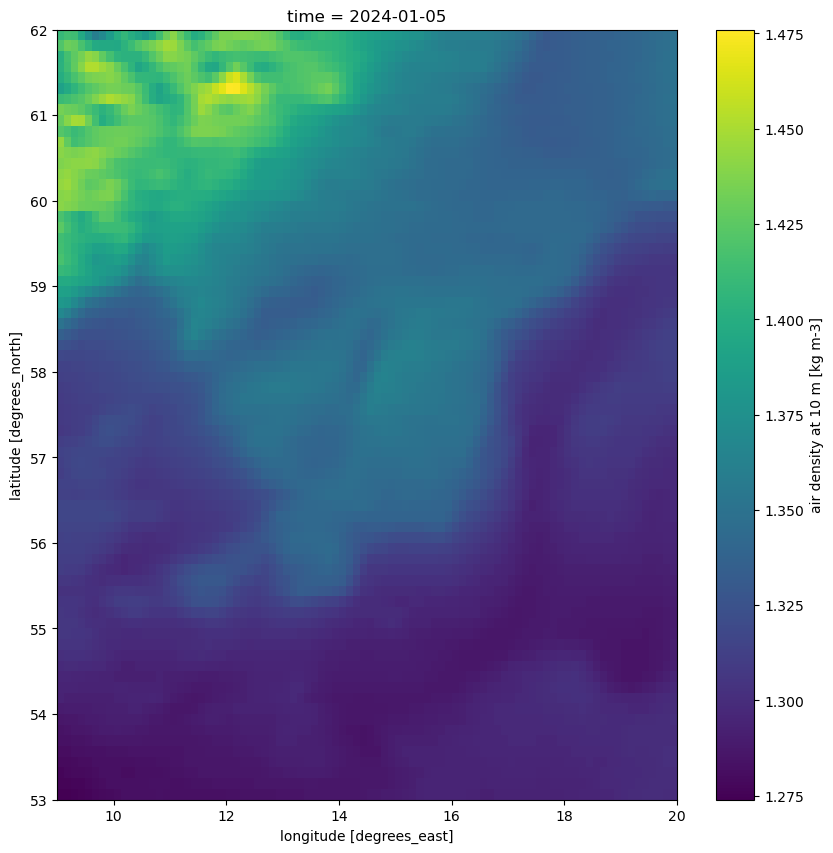

In [10]:
dataset.air_density.isel(time=-1).plot(figsize=(10, 10))